In [ ]:
@ Hrushikesh

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("AirPassengers.csv")

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data=df

In [5]:
data.describe()


,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [6]:
data.isnull().sum()


Month          0
#Passengers    0
dtype: int64

In [7]:

data['Month'] = pd.to_datetime(data['Month'])
data.head()
#data = data.drop(['Month'], axis = 1)

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [8]:
data_new = data.set_index('Month')

In [9]:
split_date = '01-Dec-1957'
data_train = data_new.loc[data_new.index <= split_date].copy()
data_test = data_new.loc[data_new.index > split_date].copy()


In [10]:
data_train.shape


(108, 1)

In [11]:
data_train.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [12]:
data_test.shape

(36, 1)

In [13]:
def create_features(df, label=None):
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    X = df[['hour','dayofweek','quarter','month','year','dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
    return X, y
    return X

In [14]:
X_train, y_train = create_features(data_train, label='#Passengers')
X_test, y_test = create_features(data_test, label='#Passengers')
X_train


C:\Users\whize\AppData\Local\Temp\ipykernel_4088\238686148.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear
C:\Users\whize\AppData\Local\Temp\ipykernel_4088\238686148.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Month,,,,,,,,
1949-01-01,0,5,1,1,1949,1,1,53
1949-02-01,0,1,1,2,1949,32,1,5
1949-03-01,0,1,1,3,1949,60,1,9
1949-04-01,0,4,2,4,1949,91,1,13
1949-05-01,0,6,2,5,1949,121,1,17
...,...,...,...,...,...,...,...,...
1957-08-01,0,3,3,8,1957,213,1,31
1957-09-01,0,6,3,9,1957,244,1,35
1957-10-01,0,1,4,10,1957,274,1,40


In [15]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [16]:
reg = xgb.XGBRegressor(n_estimators=1000)


In [17]:
reg.fit(X_train, y_train,
eval_set=[(X_train, y_train), (X_test, y_test)],
early_stopping_rounds=50,
verbose=False)


c:\users\whize\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [18]:
print("Training Accuracy :", reg.score(X_train, y_train))


Training Accuracy : 0.9999997506736875


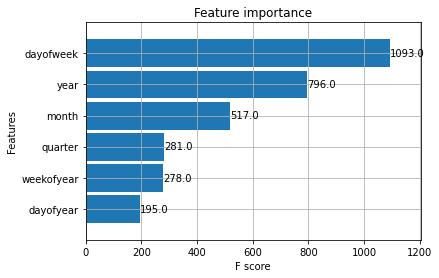

In [19]:
_ = plot_importance(reg, height=0.9)


In [20]:
data_test['number_Prediction'] = reg.predict(X_test)
data_all = pd.concat([data_test, data_train], sort=False)


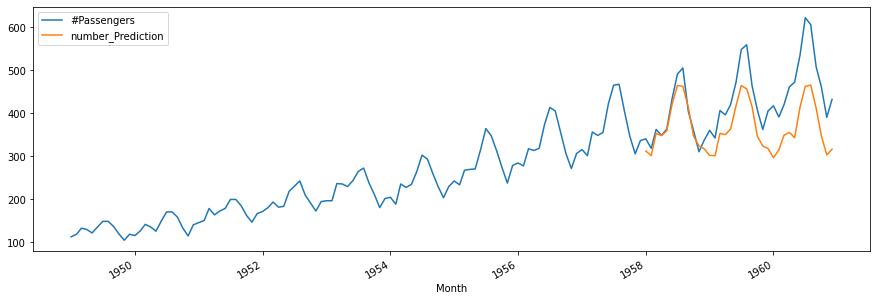

In [21]:
_ = data_all[['#Passengers','number_Prediction']].plot(figsize=(15, 5))